Data shape: (2, 21, 128, 128, 3)


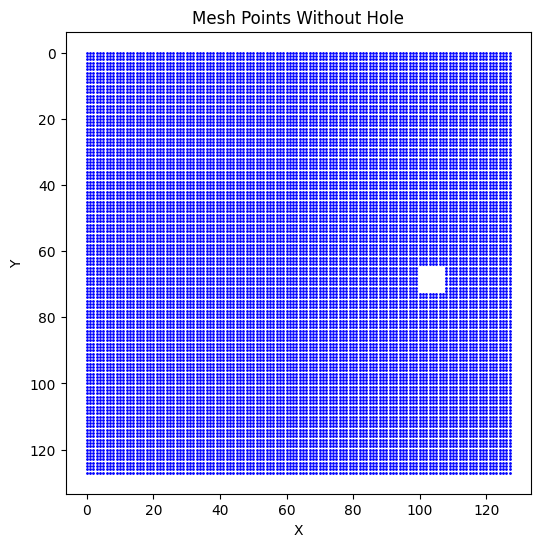

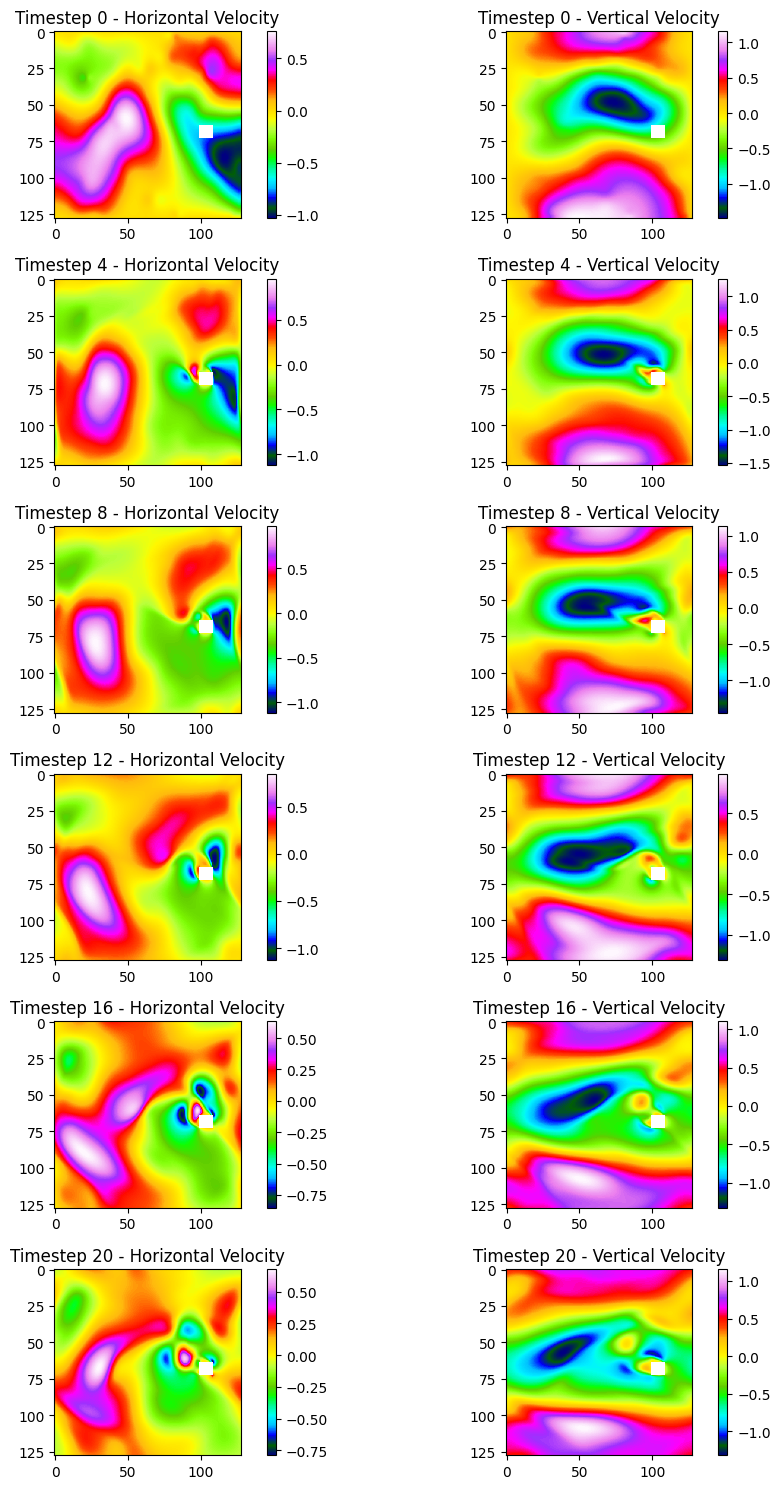

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = np.load("results2.npy")  # Shape: (num_trajectories, 21, 128, 128, 3)
print("Data shape:", data.shape)  # Should be (2, 21, 128, 128, 3)

# Plot 1: Mesh Points (Non-hole Regions Only)
plt.figure(figsize=(6, 6))
hole_mask = data[0, 0, :, :, 2]  # Using the first trajectory and first timestep
non_hole_coords = np.argwhere(hole_mask == 0)

plt.scatter(non_hole_coords[:, 1], non_hole_coords[:, 0], s=1, color='blue')
plt.gca().invert_yaxis()
plt.title("Mesh Points Without Hole")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# Plot 2: Velocity Fields for 6 Timesteps
timesteps_to_plot = [0, 4, 8, 12, 16, 20]  # Select 6 timesteps
fig, axes = plt.subplots(6, 2, figsize=(10, 15))

for idx, t in enumerate(timesteps_to_plot):
    vx = data[0, t, :, :, 0]  # Horizontal velocity
    vy = data[0, t, :, :, 1]  # Vertical velocity
    hole_mask = data[0, t, :, :, 2]  # Hole mask

    # Masking the hole
    vx_masked = np.ma.masked_where(hole_mask == 1, vx)
    vy_masked = np.ma.masked_where(hole_mask == 1, vy)

    # Plotting Horizontal Velocity
    ax1 = axes[idx, 0]
    im1 = ax1.imshow(vx_masked, cmap='gist_ncar')
    ax1.set_title(f"Timestep {t} - Horizontal Velocity")
    plt.colorbar(im1, ax=ax1)

    # Plotting Vertical Velocity
    ax2 = axes[idx, 1]
    im2 = ax2.imshow(vy_masked, cmap='gist_ncar')
    ax2.set_title(f"Timestep {t} - Vertical Velocity")
    plt.colorbar(im2, ax=ax2)

plt.tight_layout()
plt.show()
